# Aula - EDA - Boas Práticas e Exercícios

Nessa aula, iremos tratar dos seguintes conteúdos:
- Análise Exploratória dos Dados
- Estudo de Caso - Titanic
- Exercícios

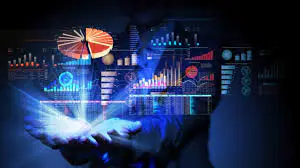

## 

## Análise Exploratória de Dados

Visto toda a teória e técnicas importantes para analisar os dados que foram desenvolvidas até então, hoje iremos focar específicamente em praticar em alguns datasets esses conhecimentos!<br>
<br>
Como boas práticas para uma análise exploratória de dados, podemos seguir os seguintes procedimentos para desenvolver a nossa análise:
<br>
- Limpeza e Manipulação dos Dados:
    * Remoção/Manipulação de Dados Errôneos;
    * Remoção/Preenchimento de Dados Faltantes;
    * Remoção de Dados Duplicados e Atributos Constantes;
    * Verificação de Alta Correlação entre Variáveis;
    * Detecção de Outliers;
- Análise Exploratória dos Dados:
    * Levantamentos de Métricas Estatísticas;
    * Levantamento de Visualizações;
    * Avaliação da Relação entre as Variáveis nos Dados.
<br><br>

Sempre bom lembrar que __não necessariamente devemos fazer todas as etapas!__ Isso vai depender muito do tipo de dados que estamos tratando. Então pode acontecer de pularmos algumas das etapas listadas acima ou mesmo fazer algo além do listado também.<br>
<br>
Mas a principal ideia é: __devemos sempre preparar os nossos dados para a análise e analisar eles para conhecer as informações que temos disponíveis__.

## 

## Estudo de Caso - Titanic

Vamos começar destrinchando de vez o clássico dataset sobre o _Titanic_!
<br><br>
O primeiro passo seria conhecer o dataset e saber mais sobre as informações disponíveis nele. Esse dataset foi obtido através do [Kaggle](https://www.kaggle.com/).<br><br>
O Kaggle é uma plataforma que têm disponível diversos datasets para estudo, alguns mini-cursos a respeito de _Data Science_ e _Machine Learning_ e até mesmo algumas competições incentivadas por grandes empresas com prÊmios para as melhores soluções desenvolvidas!

In [1]:
import numpy as np
import pandas as pd

In [40]:
# Carregando os dados do titanic
titanic = pd.read_csv('titanic.csv')

In [3]:
# Vamos selecionar 5 linhas aleatorias
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S


Olhando a documentação do [Titanic](https://www.kaggle.com/c/titanic/data) no Kaggle, conseguimos algumas informações adicionais para a entendimento dos nossos dados:<br><br>

| **Variáveis** | **Definição** | **Chave**
|---------------|---------------|-----------|
| **survived** | Sobrevivente | 0 = No, 1 = Yes |
| **name** | Nome |  |
| **pclass** | Ticket Class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| **sex** | Sexo |  |
| **age** | Idade em Anos |  |
| **sibsp** | Número de irmãos ou conjuges a bordo |  |
| **parch** | Número de parentes e filhos a bordo |  |
| **ticket** | Número do Ticket |  |
| **fare** | Tarifa |  |
| **cabin** | Cabine |  |
| **embarked** | Porto de Embarque | C = Cherbourg, Q = Queenstown, S = Southampton |

<br>

Além disso, temos algumas informações adicionais como por exemplo:
<br>
- __pclass:__ A classe no navio serve como uma identificação de classe econômica Ex.: 1st = Classe alta, 2nd = Classe Média e 3rd = Classe Baixa;

- __age:__ A idade é fracionada para valores menores que 1, e quando a idade for estimada, ela vai estar na seguinte forma xx.5;

- __sibsp:__ Pessoas com relação familiar, Sibling = (brother, sister, stepbrother, stepsister) e Spouse = husband, wife (noivas e amantes foram ignoradas);

- __parch:__ Relações familiares da seguinte forma: Parent = mother, father e Child = daughter, son, stepdaughter, stepson. Algumas crianças viajaram apenas com a babá, dessa forma parch = 0 para elas.

<br>
Na base oriunda do _Seaborn_ existem ainda até algumas outras informações além da documentação do Kaggle, vamos começar as nossas análises:

In [4]:
# Entendendo as informações no nosso dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dados Errôneos / Dados Faltantes

Vamos verificar a consistência dos dados:

In [6]:
# Usando a função isna
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Precisamos definir uma estrategia de preenchimento dos dados faltantes para a Idade, mas repare que para a coluna _Age_, podemos ter valores diferentes de médias de acordo com o sexo do passageiro:

In [7]:
# olhando para a idade
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
# Olhando as metricas por sexo
titanic[titanic['Sex'] == 'male']['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# Olhando as metricas por sexo
titanic[titanic['Sex'] == 'female']['Age'].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [41]:
# preenchendo com as medias
mask1 = titanic['Sex'] == 'male'

# Preenchendo com a media para o sexo masculino
titanic.loc[mask1, 'Age'] = titanic.loc[mask1, 'Age'].fillna(titanic.loc[mask1, 'Age'].mean())

In [17]:
# Usando a função isna
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             53
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# preenchendo com as medias
mask2 = titanic['Sex'] == 'female'

# Preenchendo com a media para o sexo masculino
titanic.loc[mask2, 'Age'] = titanic.loc[mask2, 'Age'].fillna(titanic.loc[mask2, 'Age'].mean())

In [19]:
# Usando a função isna
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Iremos remover alguns parâmetros que não serâo relevantes na nossa análise (PassengerId, Name, Ticket e Cabin) que iremos remover em seguida. No caso dos _NaN values_ para o caso do _Cabin_ e do _Embarked_ podemos remover esse valores faltantes, __mas__ se removermos todos os valores faltantes em relação ao _Cabin_ perderemos boa parte da informação!<br><br>
Por isso iremos remover a coluna _Cabin_ antes de remover os valores faltantes restantes:

In [43]:
titanic = titanic.drop(['Cabin'], axis = 1)

In [44]:
# Usando a função isna
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [45]:
# dropando linhas com dados faltantes
titanic = titanic.dropna()

In [46]:
# Usando a função isna
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

O tamanho final do dataset ficou da seguinte forma:

In [47]:
# Vamos ver as dimensões
titanic.shape

(889, 11)

## 

### Redundância de Dados

Dentro dos pontos da redundância de Dados, vamos primeiramente verificar os valores duplicados:

In [48]:
# Investigando dados duplicados
titanic[titanic.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


Avaliando os atributos constantes:

In [51]:
# Inspecionando os atributos constantes
for var in titanic:
    print(var, "| valores unicos: ", titanic[var].nunique())

PassengerId | valores unicos:  889
Survived | valores unicos:  2
Pclass | valores unicos:  3
Name | valores unicos:  889
Sex | valores unicos:  2
Age | valores unicos:  90
SibSp | valores unicos:  7
Parch | valores unicos:  7
Ticket | valores unicos:  680
Fare | valores unicos:  247
Embarked | valores unicos:  3


Agora sim, removendo o restante das colunas que não serâo úteis na análise:

In [52]:
# dropando as demais colunas
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [53]:
# dataframe final
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
# Mudando a marcação para zero e um
titanic['Sex'] = np.where(titanic['Sex'] == 'male', 1, 0)

# Verificando o dataframe
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,27.915709,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [57]:
# usando o get dummies
titanic = pd.get_dummies(titanic,
                         columns = ['Embarked'],
                         drop_first = True)

In [58]:
# Mostrando o dataframe
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


Vamos verificar agora a correlação entre as variáveis e tentar descobrir alta correlação entre elas:

In [59]:
# Calculando a correlação
corr = titanic.corr()

# Mostrando a correlação
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.541585,-0.085363,-0.034040,0.083151,0.255290,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.327009,0.081656,0.016824,-0.548193,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.108611,-0.116348,-0.247508,-0.179958,-0.075217,0.121405
Age,-0.085363,-0.327009,0.108611,1.000000,-0.236188,-0.181612,0.086114,-0.018964,-0.017519
SibSp,-0.034040,0.081656,-0.116348,-0.236188,1.000000,0.414542,0.160887,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.181612,0.414542,1.000000,0.217532,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.086114,0.160887,0.217532,1.000000,-0.116684,-0.163758
Embarked_Q,0.004536,0.220558,-0.075217,-0.018964,-0.026692,-0.081585,-0.116684,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.121405,-0.017519,0.069438,0.061512,-0.163758,-0.499261,1.000000


Entre _SibSp_ e _Parch_ existe até uma certa correlação mas mesmo assim não é tâo alta e para as demais variáveis não temos uma correlação expressiva.<br><br>
Dessa forma, não iremos remover nenhuma variáveis devido a alta correlação.

In [60]:
# Biblioteca do matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns

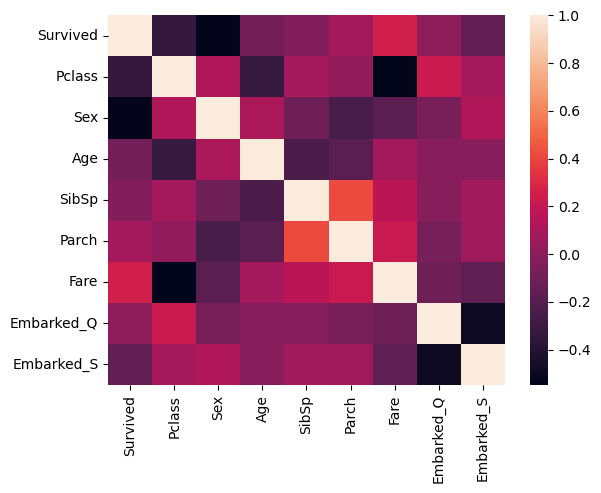

In [61]:
# Criando um mapa de calor
sns.heatmap(corr)

# msotrar o grafico
plt.show()

## 

### Visualização dos Dados

Nesta parte final da EDA, vamos justamente avaliar os _Outliers_ já fazendo algumas combinações de visualizações dos Dados e falar um pouco a respeito das impressões que tivemos com os resultados:

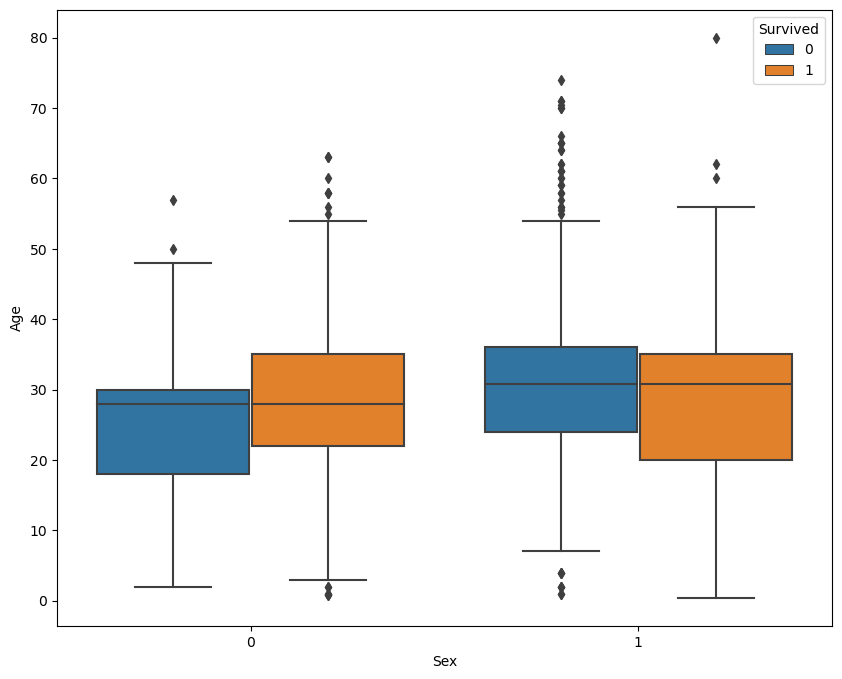

In [62]:
# Customizar a janela de grafico
plt.figure(figsize = (10, 8))

# Criando o boxplot
sns.boxplot(x = 'Sex',
            y = 'Age',
            hue = 'Survived',
            data = titanic)

#mostrando o grafico
plt.show()

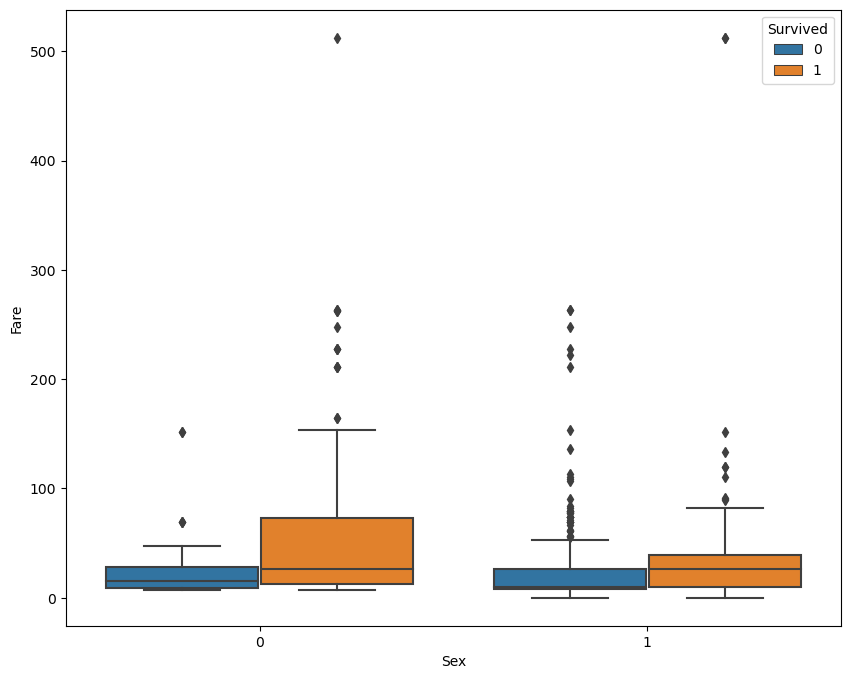

In [63]:
# Customizar a janela de grafico
plt.figure(figsize = (10, 8))

# Criando o boxplot
sns.boxplot(x = 'Sex',
            y = 'Fare',
            hue = 'Survived',
            data = titanic)

#mostrando o grafico
plt.show()

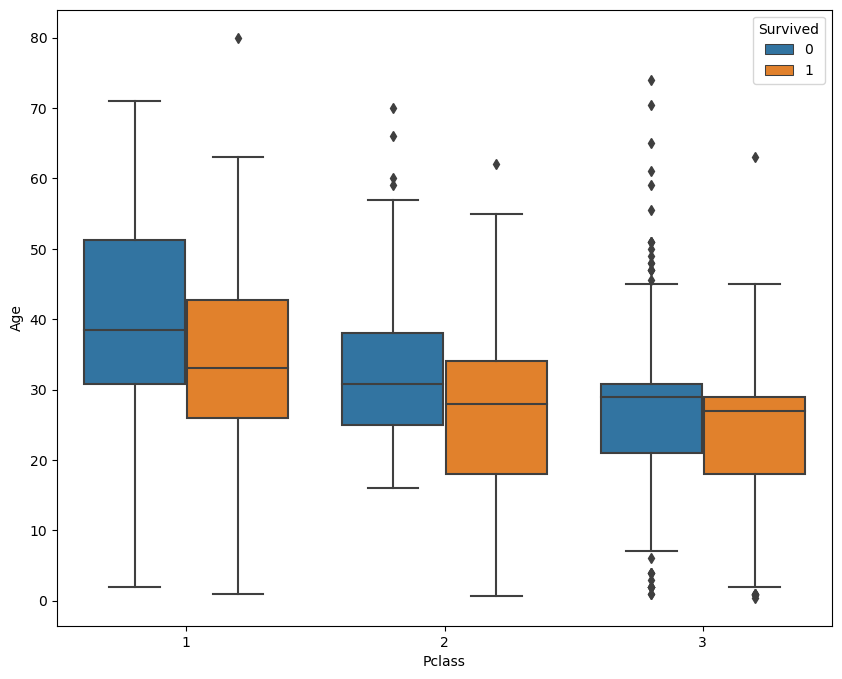

In [64]:
# Customizar a janela de grafico
plt.figure(figsize = (10, 8))

# Criando o boxplot
sns.boxplot(x = 'Pclass',
            y = 'Age',
            hue = 'Survived',
            data = titanic)

#mostrando o grafico
plt.show()

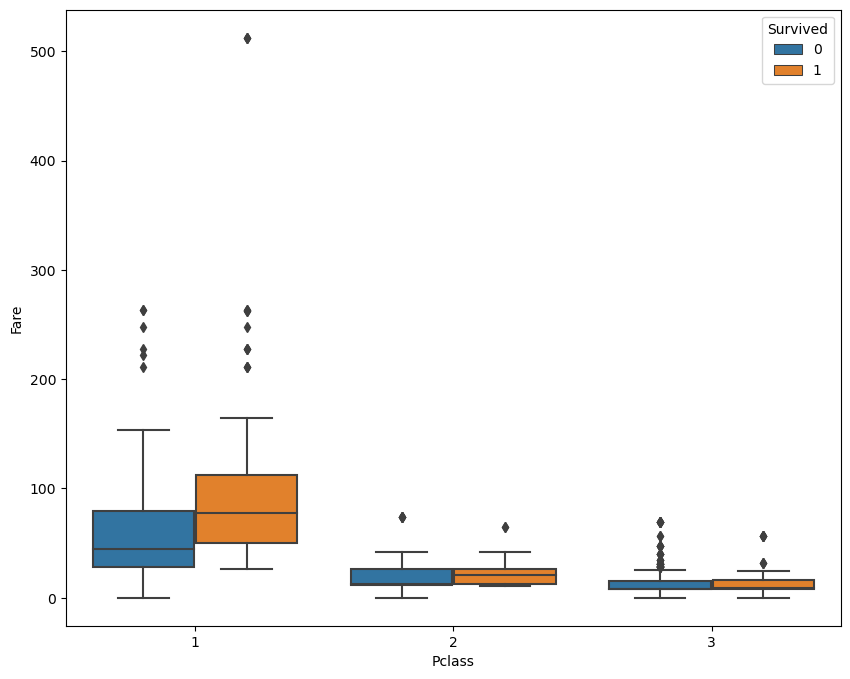

In [65]:
# Customizar a janela de grafico
plt.figure(figsize = (10, 8))

# Criando o boxplot
sns.boxplot(x = 'Pclass',
            y = 'Fare',
            hue = 'Survived',
            data = titanic)

#mostrando o grafico
plt.show()

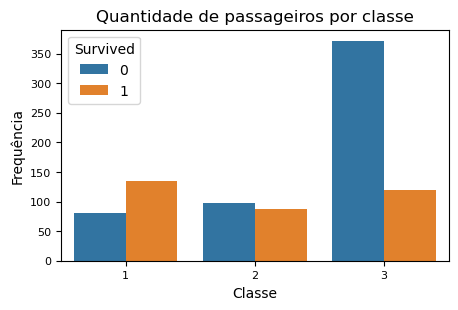

In [69]:
# Visualizando com gráfico de barras

# dimensionando a figura
plt.figure(figsize = (5, 3))

# Criando um grafico de barras
sns.countplot(data = titanic,
              x = 'Pclass',
              hue = 'Survived')

# Colocando um titulo
plt.title('Quantidade de passageiros por classe', fontsize = 12)

# Nome dos eixos
plt.xlabel('Classe', fontsize = 10)
plt.ylabel('Frequência', fontsize = 10)

# Aumentar os numeros da grade
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

# mostrando o gráfico
plt.show()

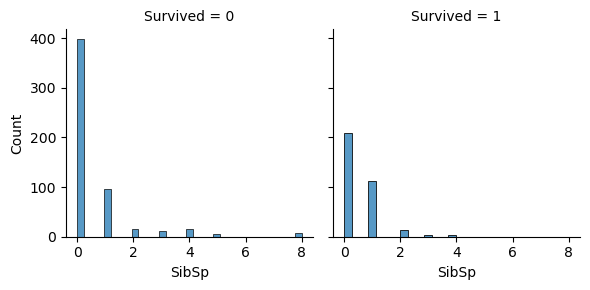

In [71]:
# Trabalhando com Grid
grid = sns.FacetGrid(titanic, col = 'Survived')

# Criando um grip com histograma
grid.map(sns.histplot, "SibSp")

# Mostrando o gráfico
plt.show()

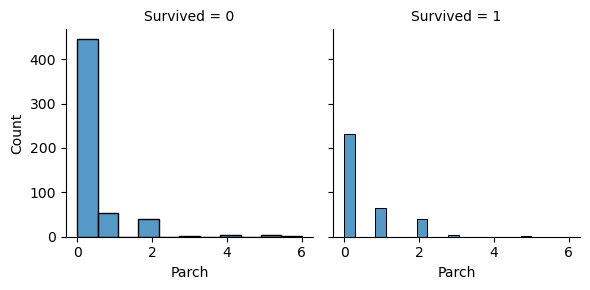

In [72]:
# Trabalhando com Grid
grid = sns.FacetGrid(titanic, col = 'Survived')

# Criando um grip com histograma
grid.map(sns.histplot, "Parch")

# Mostrando o gráfico
plt.show()

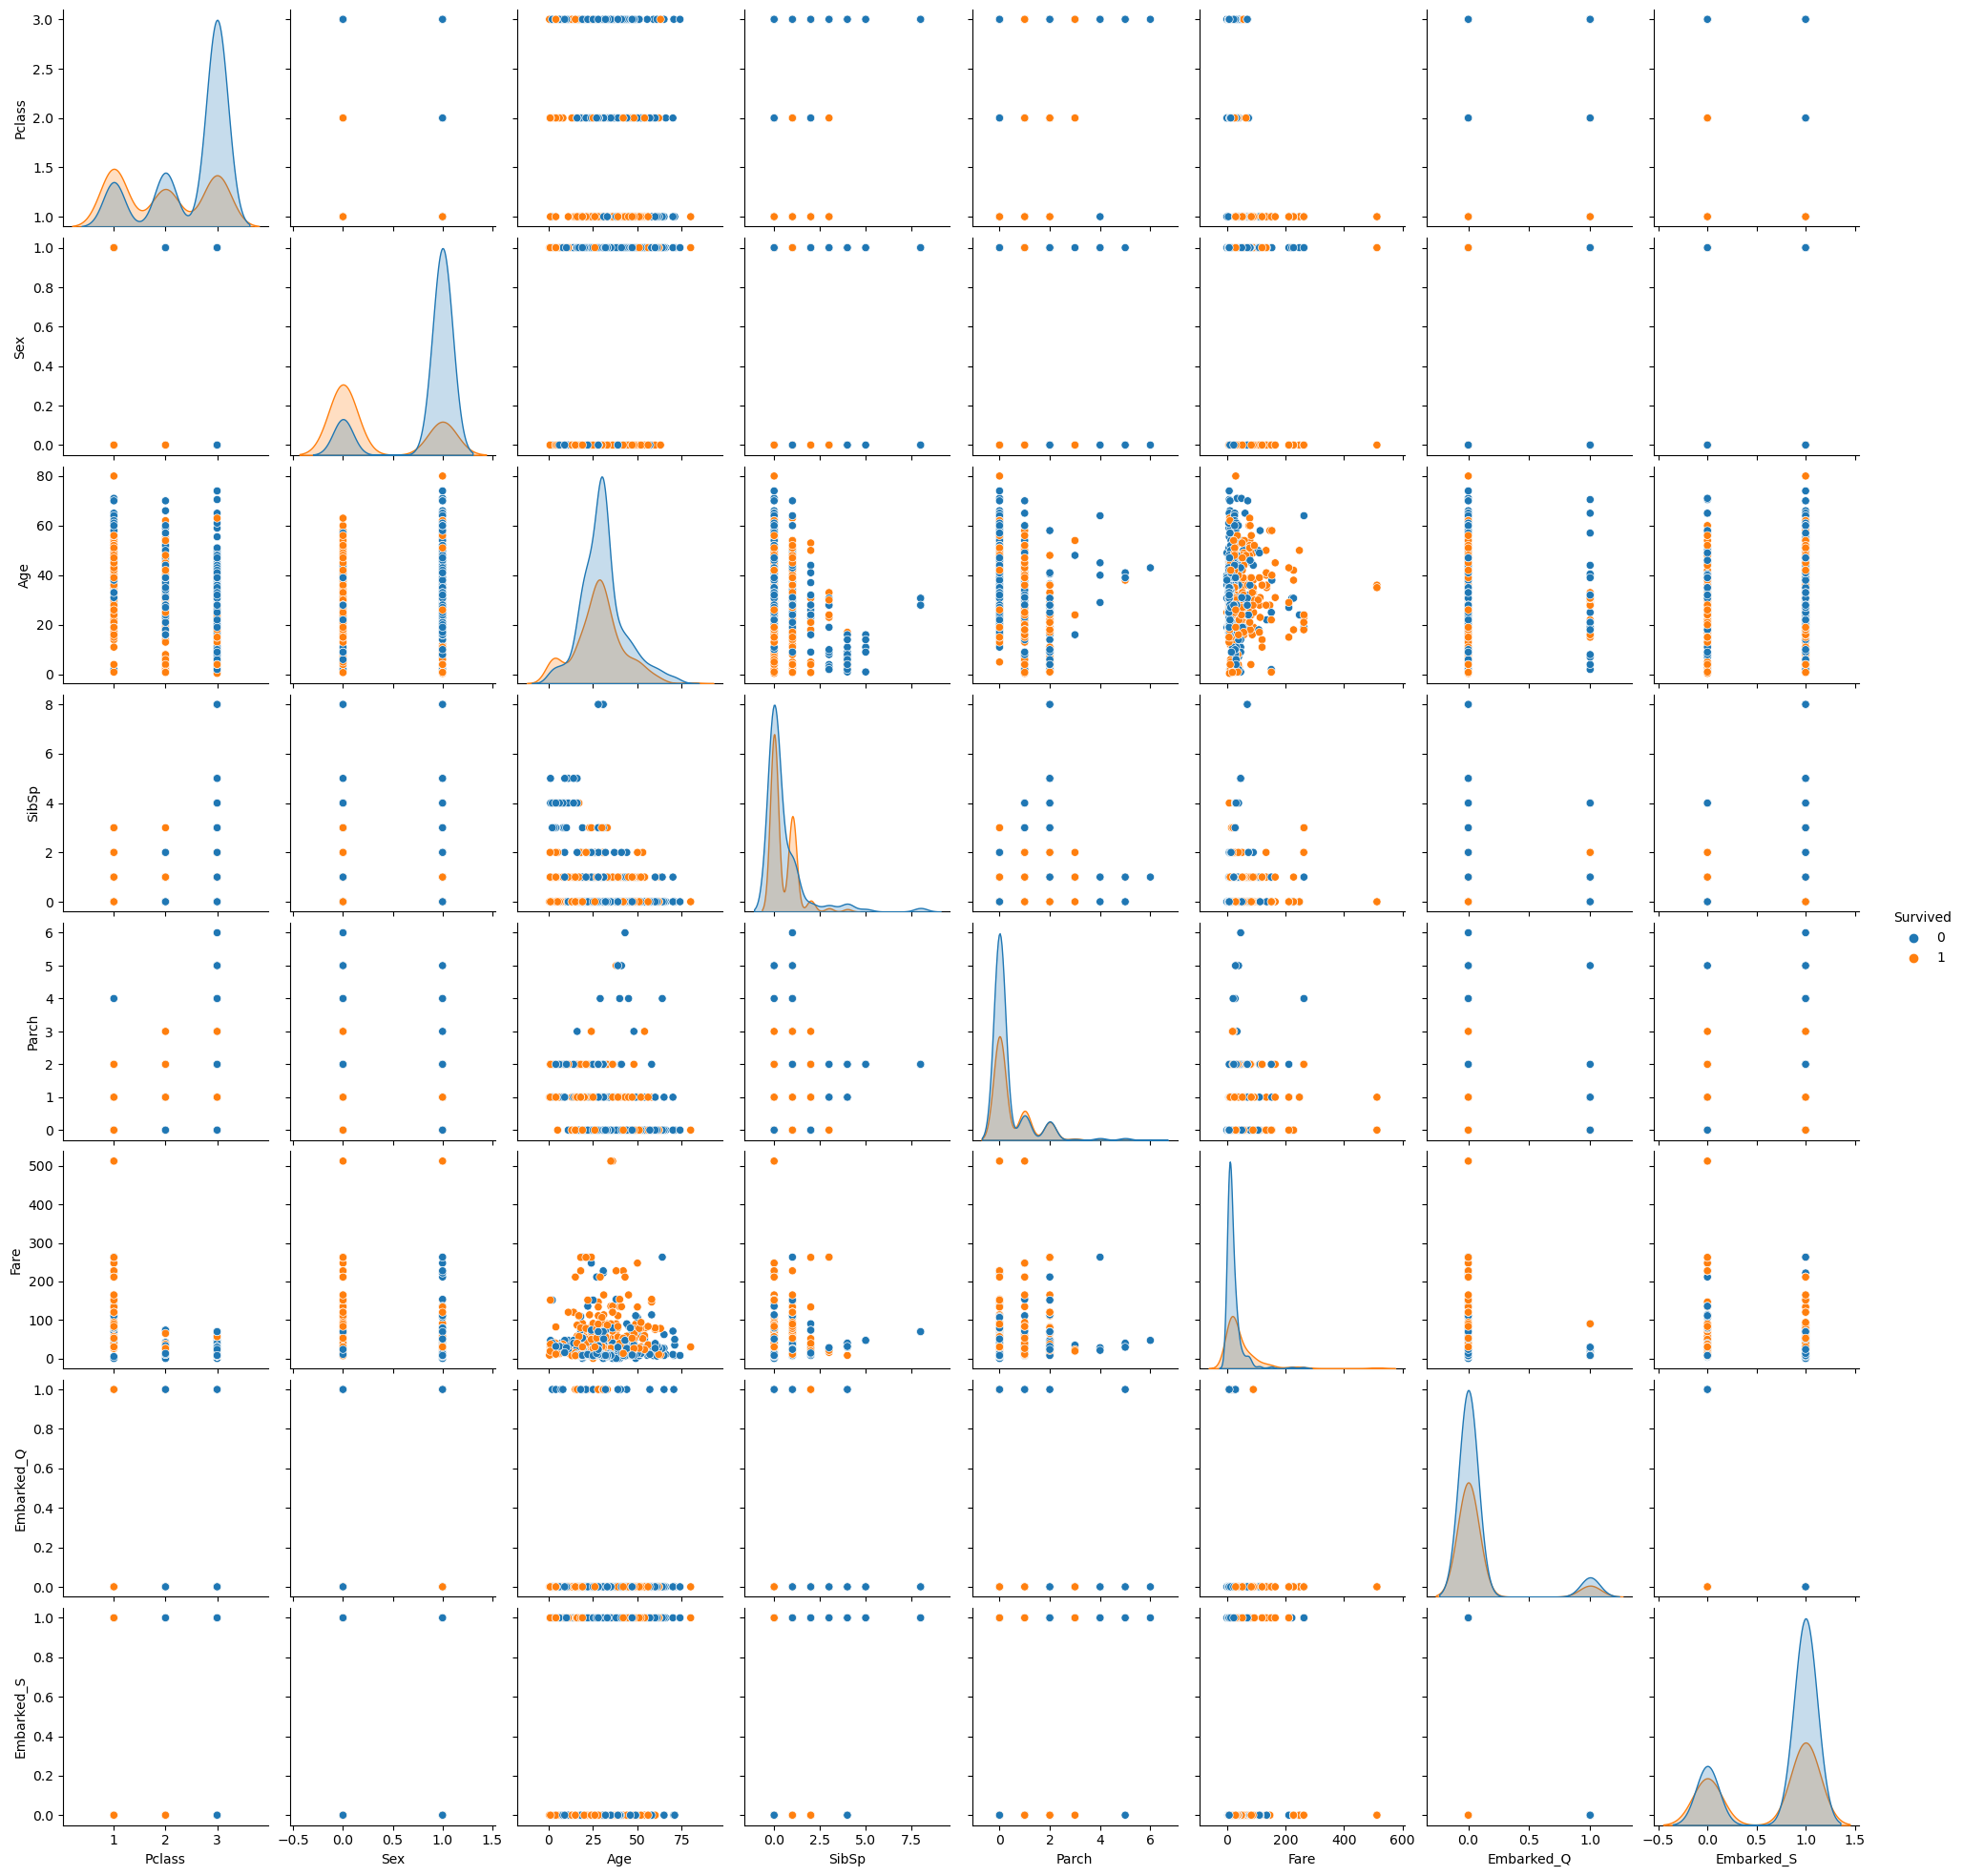

In [73]:
# Criando um pairplot
sns.pairplot(titanic, hue = 'Survived')

# Mostra o gráfico
plt.show()

Essa são algumas sugestões de visualizações que podem ser feitas para esse dataset, mas vocês podem muito bem sugerir outra combinação de dados que não foi levada em consideração na aula!

## 

## Exercícios

__1)__ Faça a análise exploratória dos dados referente ao dataset [Finance Data](https://www.kaggle.com/nitindatta/finance-data?select=Original_data.csv). Consulte o Kaggle para mais informações a respeito dos tipos de dados que estão disponíveis e faça o processo de análise seguindo os passos da aula.

## 

__2)__ Faça a análise exploratória dos dados referente ao dataset [Students Performance](https://www.kaggle.com/spscientist/students-performance-in-exams). Consulte o Kaggle para mais informações a respeito dos tipos de dados que estão disponíveis e faça o processo de análise seguindo os passos da aula.





## Opções de Datasets para o projeto

[1 - Car Insurance Claim](https://www.kaggle.com/sagnik1511/car-insurance-data)

[2 - World Happiness Report](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

[3 - U.S Financial Education](https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv)

[4 - True Value Cars](https://www.kaggle.com/focusedmonk/true-value-cars-dataset?select=train.csv)

[5 - House Sales](https://www.kaggle.com/harlfoxem/housesalesprediction)

[6 - Hotel Booking Demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[7 - Credit Card Costumers - Churn](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

[8 - SF Salaries](https://www.kaggle.com/kaggle/sf-salaries)

[9 - Credit Car Clients - Default](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

## 

## Links, Artigos e Referências:

- [O uqe é o GitHub?](https://blog.geekhunter.com.br/github-o-que-e-como-usar/), artigo publicado pelo GeekHunter falando a respeito do GitHub e dicas de como usar;
- [Aprenda a usar o Github como seu portfólio](http://blog.triadworks.com.br/aprenda-a-usar-o-github-como-seu-portfolio), artigo publicado pelo blog Triadworks falando sobre GitHub e portfólios;
- [Como criar um portfólio no GitHub em 10 passos](https://lopesdiego12.medium.com/como-criar-um-portf%C3%B3lio-de-maneira-simples-com-o-dom%C3%ADnio-github-io-8d4b8c3ba138), artigo publicado pelo Diego Lopes no Medium;
- [Markdowns for Jupyter Notebooks Cheatsheet](https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed), artigo publicado pelo Inge Halilovic no Medium.